In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [2]:
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Machine Learning in Python\Achievement 2\Project Data\\'

In [3]:
df_weather = pd.read_csv(os.path.join(path, 'DATASET_weather.csv'))
df_answers = pd.read_csv(os.path.join(path, 'DATASET_predictions.csv'))
df_weather.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

In [4]:
df_answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [5]:
cols = ['BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 
        'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 
        'BASEL_temp_max', 'BASEL_temp_min', 'BASEL_temp_mean']
df_basel = df_weather[cols]
df_basel.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0                  7               2.1            0.85           1.018   
1                  6               2.1            0.84           1.018   
2                  8               2.1            0.90           1.018   
3                  3               2.1            0.92           1.018   
4                  6               2.1            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0                    0.32                 0.09                 0   
1                    0.36                 1.05                 0   
2                    0.18                 0.30                 0   
3                    0.58                 0.00                 0   
4                    0.65                 0.14                 0   

   BASEL_sunshine  BASEL_temp_max  BASEL_temp_min  BASEL_temp_mean  
0             0.7            10.9             0.8              6.5  
1             1.1            10.1             3.3              6.1  
2             0.0             9.9             5.1              8.5  
3             4.1            10.6             3.8              6.3  
4             5.4             6.0            -0.7              3.0

In [6]:
#Run the PCA model, reducing to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_basel)

In [7]:
#Make a dataframe of the new components
dfPCA_basel = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])
dfPCA_basel.head()

PCA1      PCA2
0   8.298215 -1.628643
1   7.755890 -2.046452
2   6.018101 -4.826221
3   6.388633  1.456182
4  13.266945  2.702852

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [9]:
distance_single_basel = linkage(dfPCA_basel,method="single")

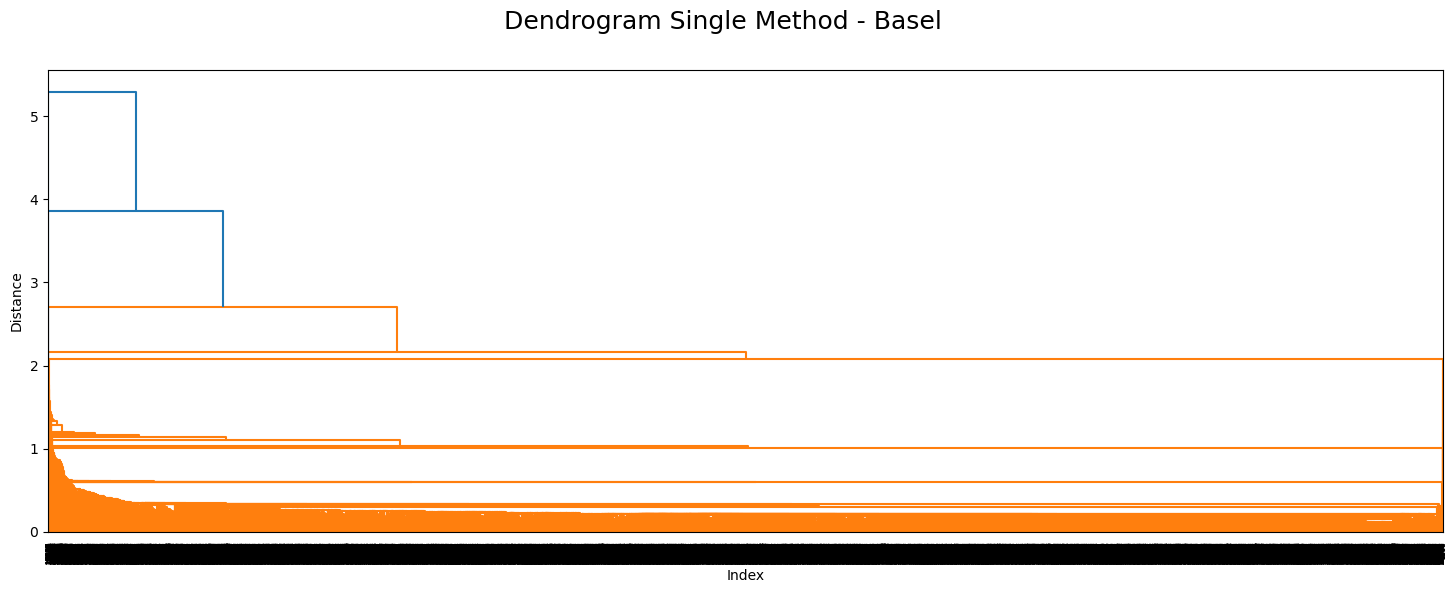

In [10]:
plt.figure(figsize=(18,6))
dendrogram(distance_single_basel, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method - Basel",fontsize=18)
plt.show()

In [11]:
distance_complete_basel = linkage(dfPCA_basel,method="complete")

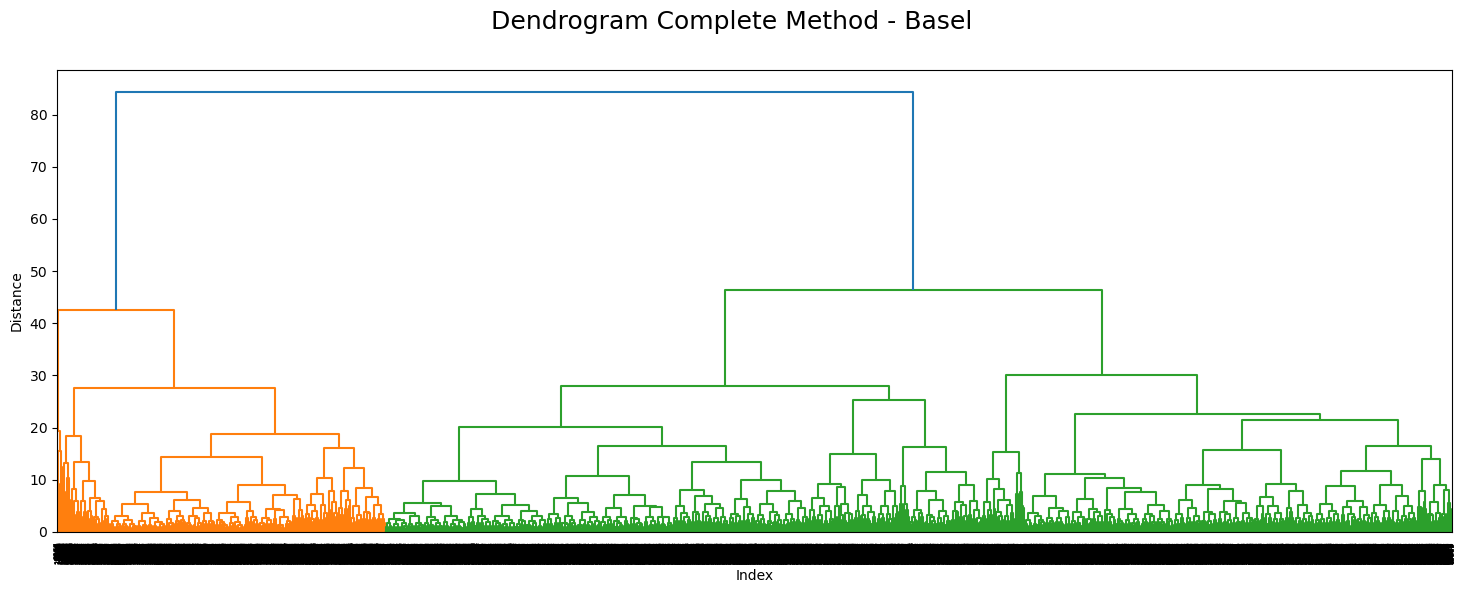

In [12]:
plt.figure(figsize=(18,6))
dendrogram(distance_complete_basel, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method - Basel",fontsize=18)
plt.show()

In [13]:
distance_ward_basel = linkage(dfPCA_basel,method="ward")

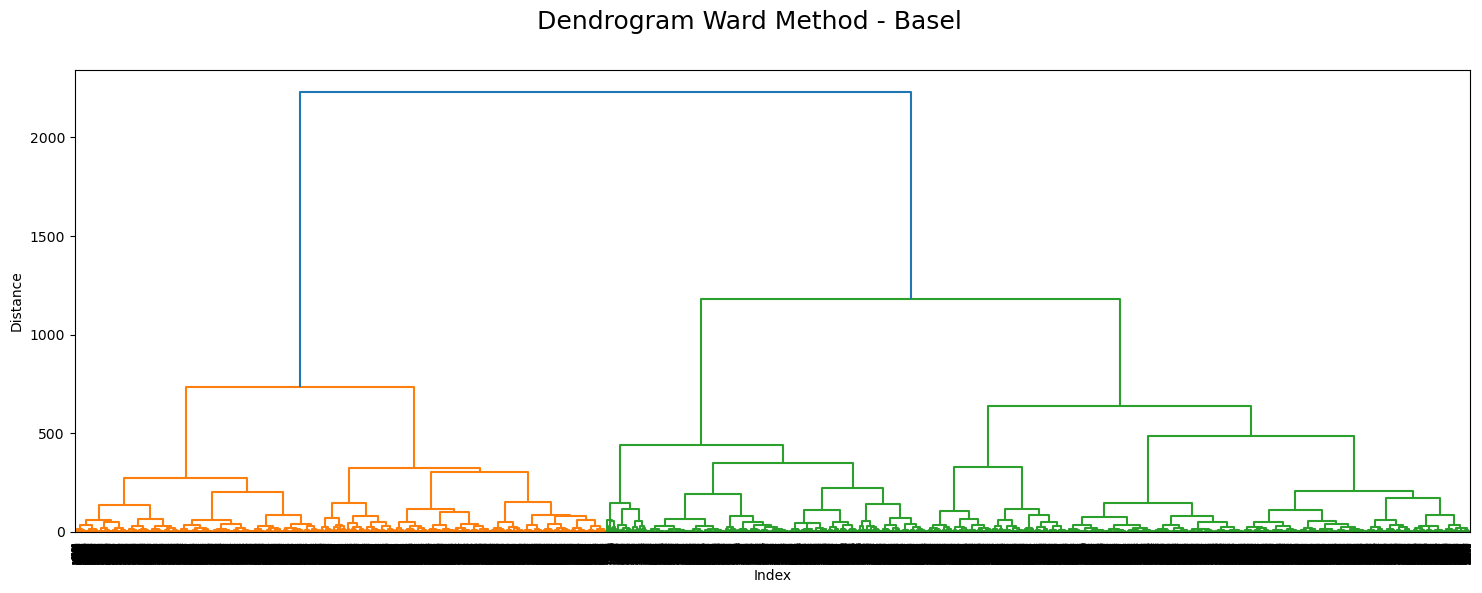

In [14]:
plt.figure(figsize=(18,6))
dendrogram(distance_ward_basel, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method - Basel",fontsize=18)
plt.show()

In [15]:
distance_average_basel = linkage(dfPCA_basel,method="average")

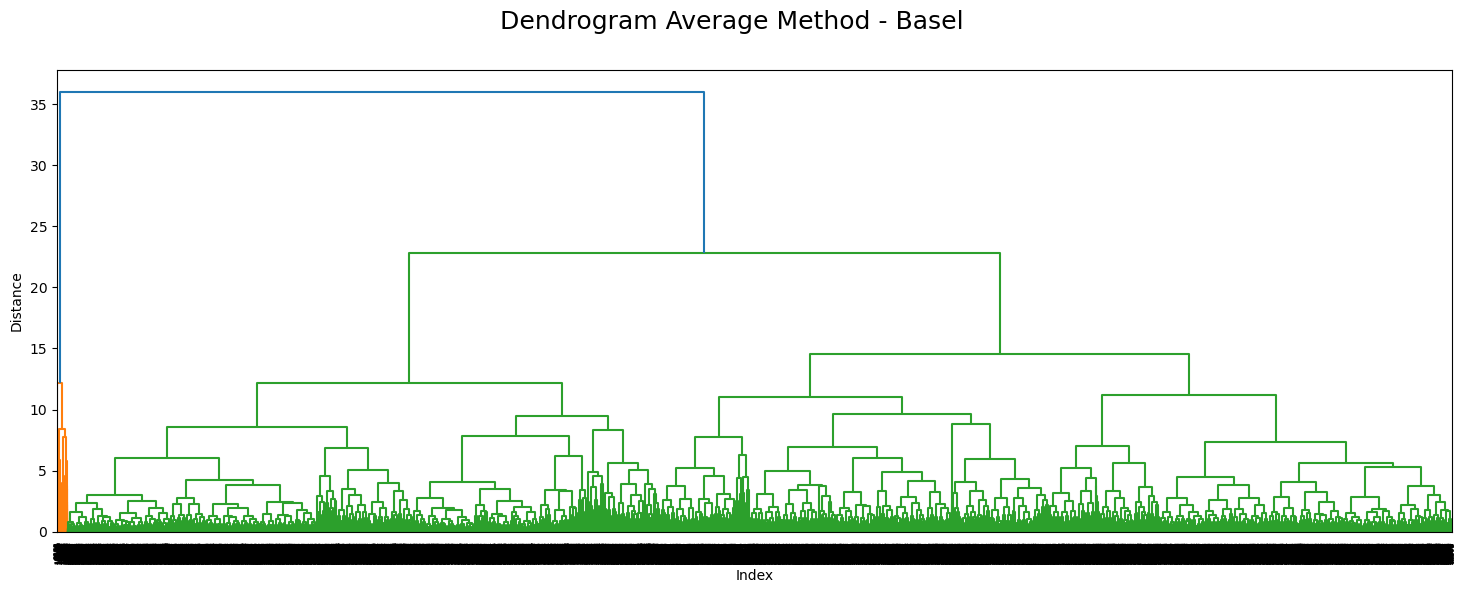

In [22]:
plt.figure(figsize=(18,6))
dendrogram(distance_average_basel, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method - Basel",fontsize=18)
plt.show()

In [24]:
cols_heathrow = ['HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure', 
        'HEATHROW_global_radiation', 'HEATHROW_precipitation', 'HEATHROW_snow_depth', 'HEATHROW_sunshine', 
        'HEATHROW_temp_max', 'HEATHROW_temp_min', 'HEATHROW_temp_mean']
df_heathrow = df_weather[cols_heathrow]
df_heathrow.head()

HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0                     7               0.91             1.0010   
1                     7               0.98             1.0051   
2                     8               0.96             1.0166   
3                     8               0.98             1.0230   
4                     5               0.84             1.0275   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_snow_depth  \
0                       0.13                    0.22                    0   
1                       0.13                    0.23                    0   
2                       0.15                    0.07                    0   
3                       0.13                    0.00                    0   
4                       0.30                    0.00                    0   

   HEATHROW_sunshine  HEATHROW_temp_max  HEATHROW_temp_min  HEATHROW_temp_mean  
0                0.0                8.3                9.4                10.6  
1                0.0               10.6                3.9                 6.1  
2                0.1               12.2                6.1                 8.4  
3                0.0                8.9                6.7                 9.4  
4                2.1                7.2                8.9                 8.9

In [25]:
df_madrid = df_weather.loc[:, df_weather.columns.str.startswith('MADRID')]
df_madrid.head()

MADRID_cloud_cover  MADRID_wind_speed  MADRID_humidity  MADRID_pressure  \
0                   6                0.0             0.92           1.0260   
1                   7                0.8             0.86           1.0254   
2                   5                1.9             0.90           1.0287   
3                   0                1.1             0.75           1.0281   
4                   2                1.1             0.64           1.0269   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   
1                     0.46                   0.0              0.9   
2                     0.63                   0.0              2.3   
3                     1.16                   0.0              8.7   
4                     1.10                   0.0              7.8   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0               7.6              4.4             10.8  
1               9.8              7.4             12.2  
2               8.6              6.4             10.8  
3              10.3              4.5             16.1  
4              12.1              8.2             16.0

In [26]:
pca_heathrow = PCA(n_components=2)
principalComponents = pca.fit_transform(df_heathrow)

In [27]:
dfPCA_heathrow = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])
dfPCA_heathrow.head()

PCA1      PCA2
0  4.530887 -5.866871
1  8.331202 -2.903513
2  4.955451 -4.123214
3  6.197688 -5.007645
4  5.953761 -3.094584

In [28]:
pca_madrid = PCA(n_components=2)
principalComponents = pca.fit_transform(df_madrid)
dfPCA_madrid = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])
dfPCA_madrid.head()

PCA1      PCA2
0 -14.090114  3.658014
1 -10.730777  5.858698
2 -12.341287  3.353443
3  -7.156638 -4.994243
4  -4.815045 -1.671633

In [29]:
distance_ward_heathrow = linkage(dfPCA_heathrow,method="ward")

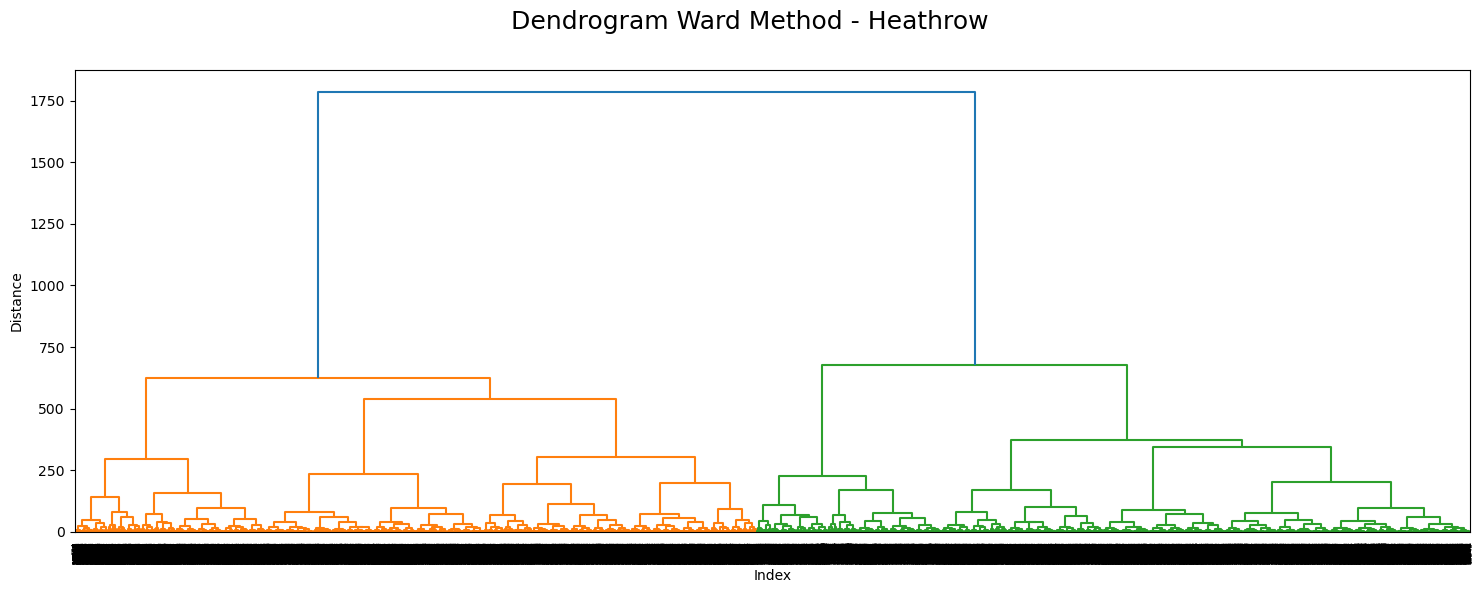

In [30]:
plt.figure(figsize=(18,6))
dendrogram(distance_ward_heathrow, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method - Heathrow",fontsize=18)
plt.show()

In [31]:
distance_ward_madrid = linkage(dfPCA_madrid,method="ward")

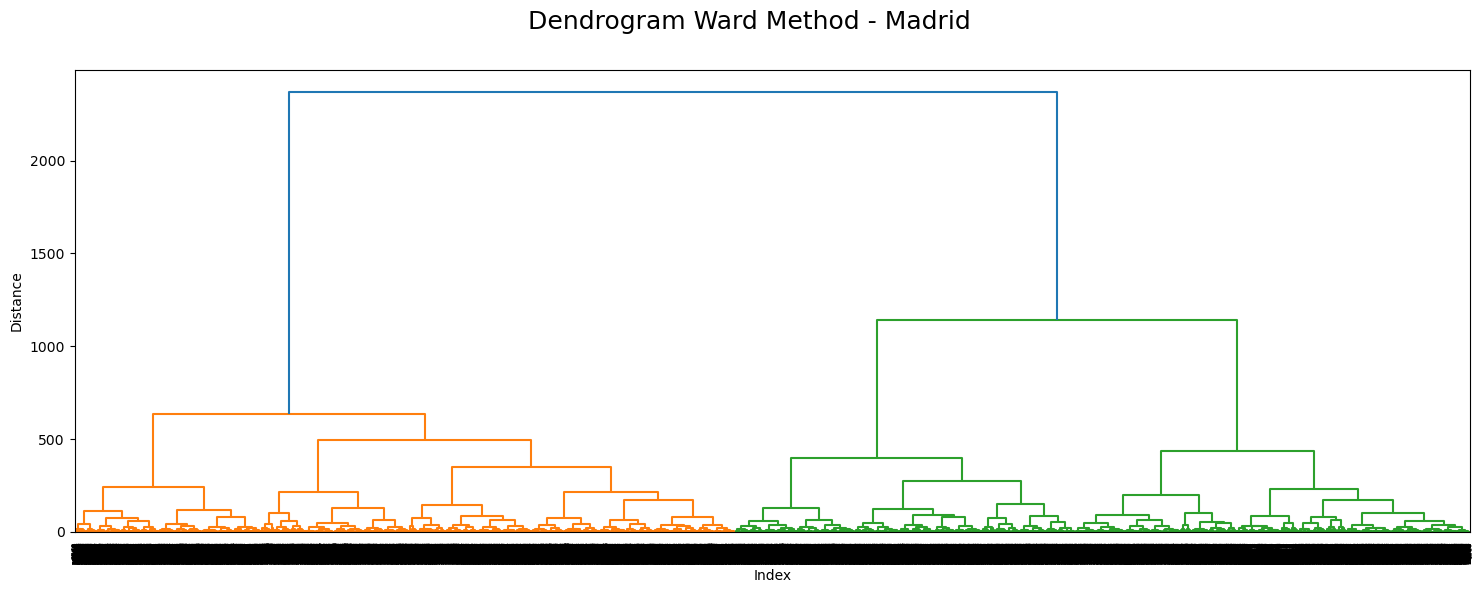

In [32]:
plt.figure(figsize=(18,6))
dendrogram(distance_ward_madrid, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method - Madrid",fontsize=18)
plt.show()

In [33]:
distance_complete_heathrow = linkage(dfPCA_heathrow,method="complete")

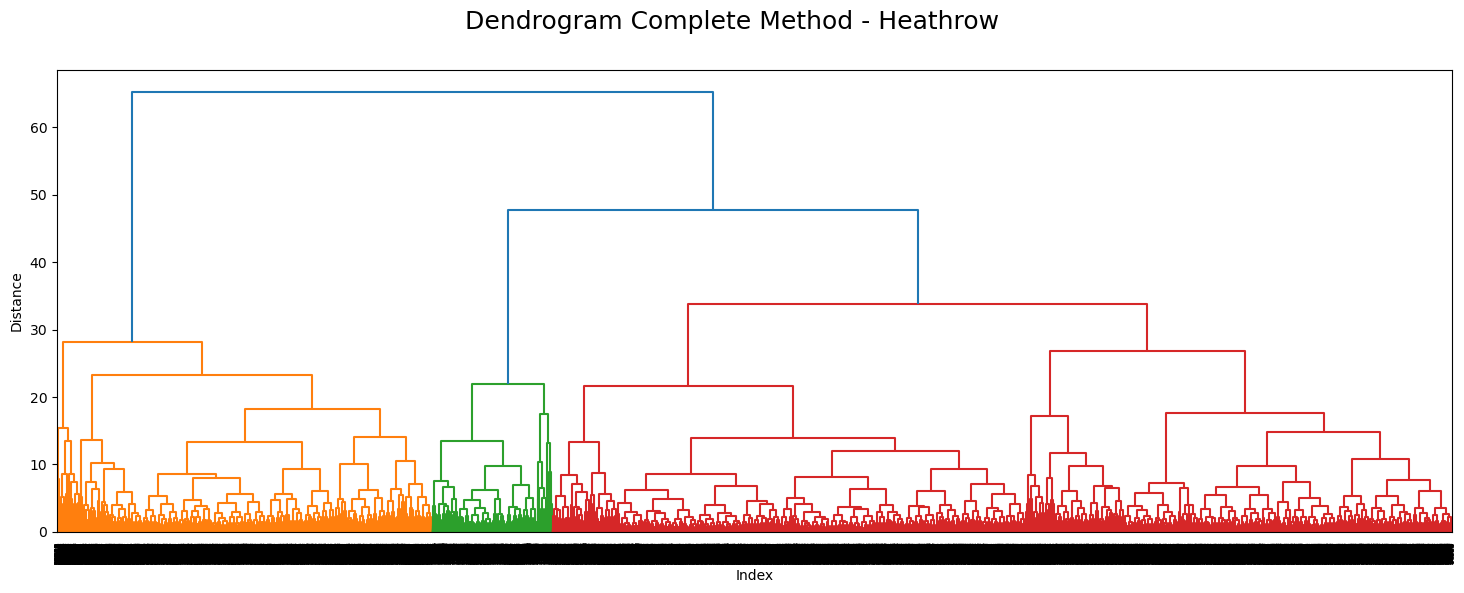

In [34]:
plt.figure(figsize=(18,6))
dendrogram(distance_complete_heathrow, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method - Heathrow",fontsize=18)
plt.show()

In [35]:
distance_complete_madrid = linkage(dfPCA_madrid,method="complete")

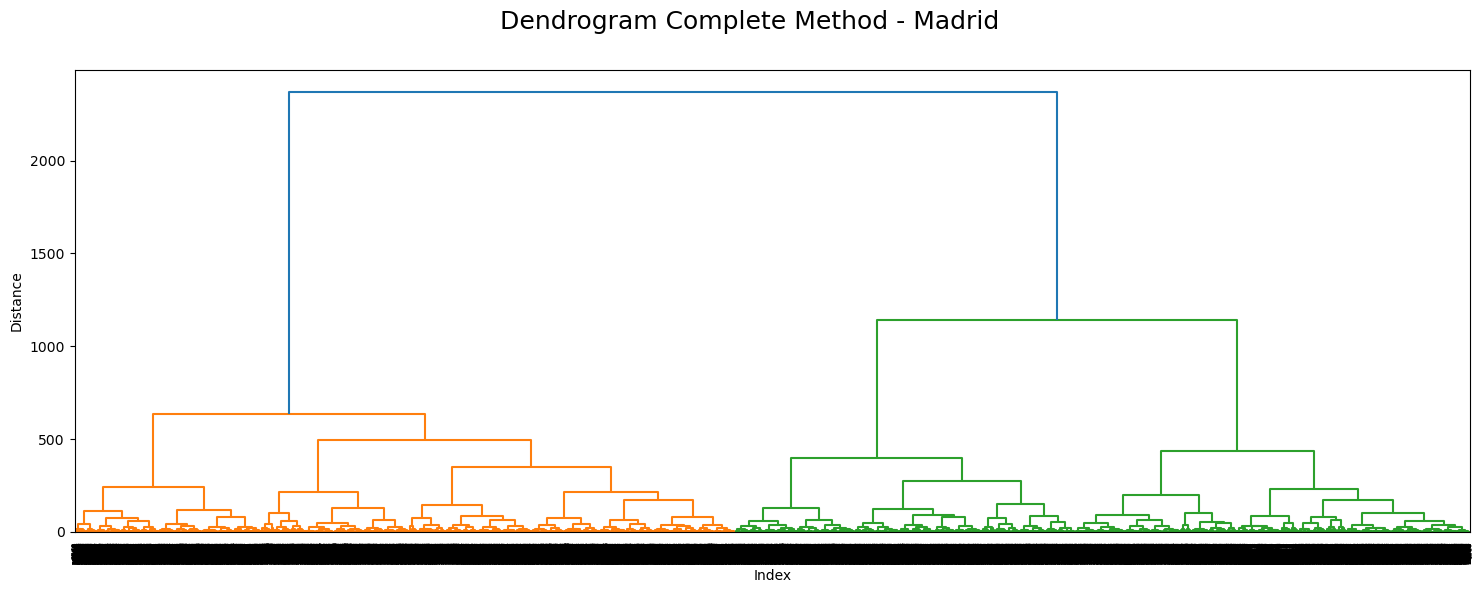

In [36]:
plt.figure(figsize=(18,6))
dendrogram(distance_ward_madrid, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method - Madrid",fontsize=18)
plt.show()

In [37]:
df_basel_CM=df_basel.copy()

df_basel_CM['clust2']=fcluster(distance_complete_basel,2, criterion='maxclust')
dfPCA_basel['clust2'] = df_basel_CM['clust2'].values
dfPCA_basel['label'] = df_answers['BASEL_pleasant_weather']
dfPCA_basel.head()

PCA1      PCA2  clust2  label
0   8.298215 -1.628643       2      0
1   7.755890 -2.046452       2      0
2   6.018101 -4.826221       2      0
3   6.388633  1.456182       2      0
4  13.266945  2.702852       1      0

In [38]:
df_heathrow_CM=df_heathrow.copy()

df_heathrow_CM['clust2']=fcluster(distance_complete_heathrow,2, criterion='maxclust')
dfPCA_heathrow['clust2'] = df_heathrow_CM['clust2'].values
dfPCA_heathrow['label'] = df_answers['HEATHROW_pleasant_weather']
dfPCA_heathrow.head()

PCA1      PCA2  clust2  label
0  4.530887 -5.866871       2      0
1  8.331202 -2.903513       2      0
2  4.955451 -4.123214       2      0
3  6.197688 -5.007645       2      0
4  5.953761 -3.094584       2      0

In [39]:
df_madrid_CM=df_madrid.copy()

df_madrid_CM['clust2']=fcluster(distance_complete_madrid,2, criterion='maxclust')
dfPCA_madrid['clust2'] = df_madrid_CM['clust2'].values
dfPCA_madrid['label'] = df_answers['MADRID_pleasant_weather']
dfPCA_madrid.head()

PCA1      PCA2  clust2  label
0 -14.090114  3.658014       2      0
1 -10.730777  5.858698       2      0
2 -12.341287  3.353443       2      0
3  -7.156638 -4.994243       2      0
4  -4.815045 -1.671633       2      0

<Axes: title={'center': 'Pleasant or Unpleasant'}, xlabel='PCA1', ylabel='PCA2'>

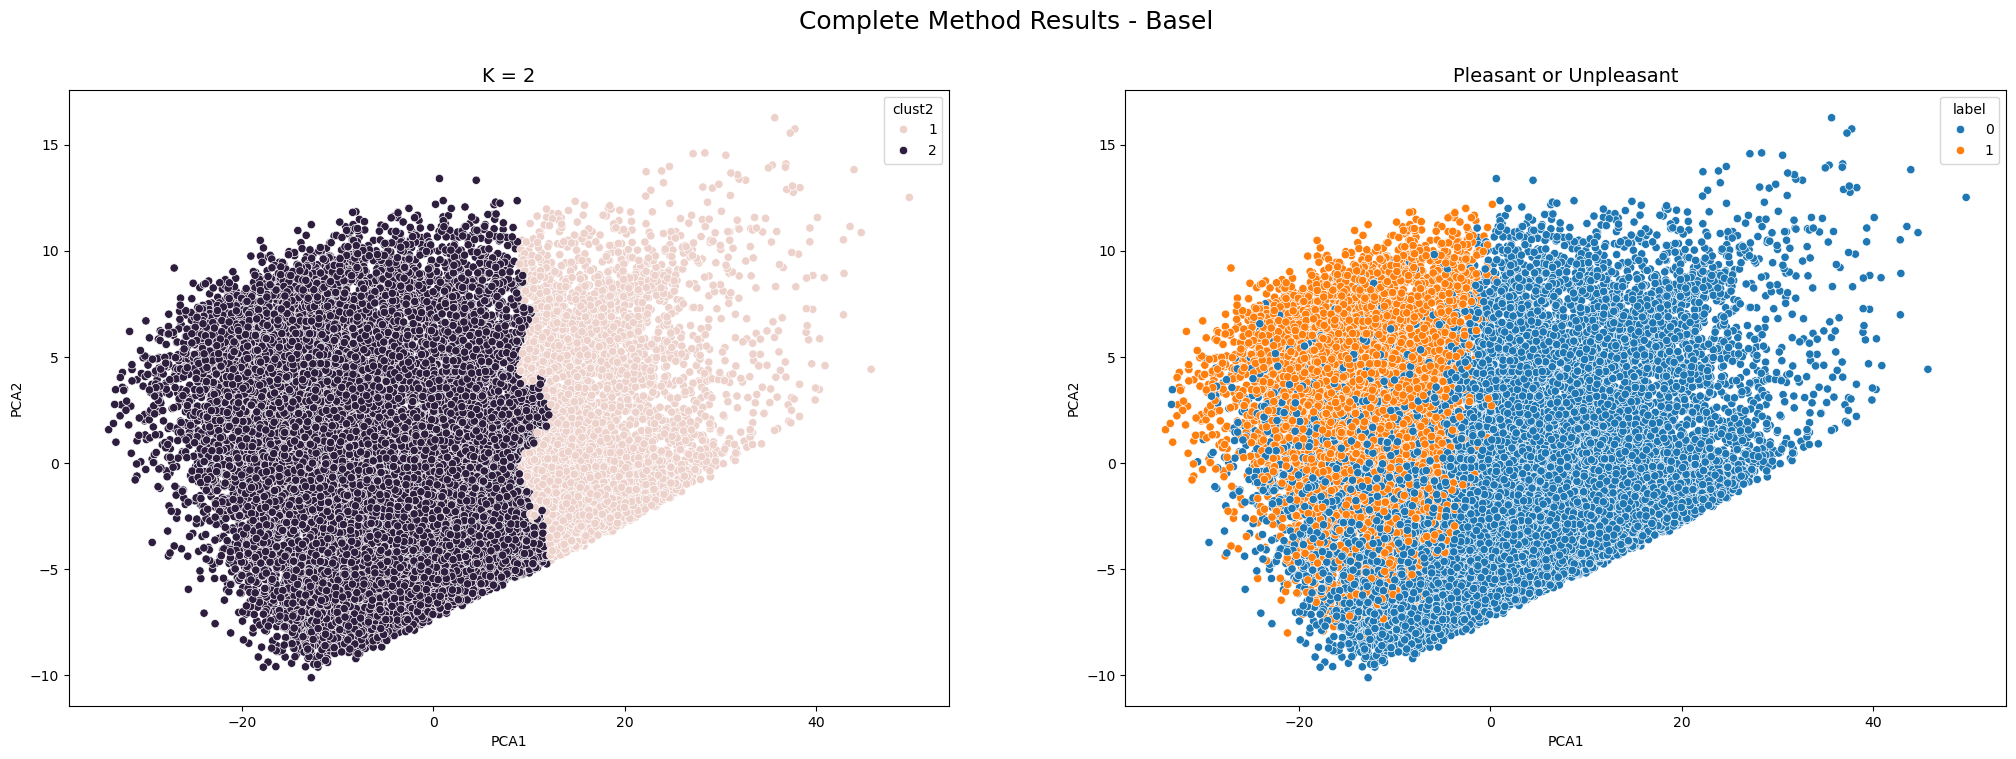

In [40]:
df_plot_basel=dfPCA_basel.copy()

df_plot_basel['clust2']=fcluster(distance_ward_basel,2, criterion='maxclust') # adding the clusters to the plotting dataframe
df_plot_basel["label"] = df_answers["BASEL_pleasant_weather"] # add a label column from the answers dataframe (we will do other stations later)

#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Complete Method Results - Basel",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_basel, hue="clust2")


plt.subplot(1,2,2)
plt.title("Pleasant or Unpleasant",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_basel, hue="label") # label here is from when we added the label column above

<Axes: title={'center': 'Pleasant or Unpleasant'}, xlabel='PCA1', ylabel='PCA2'>

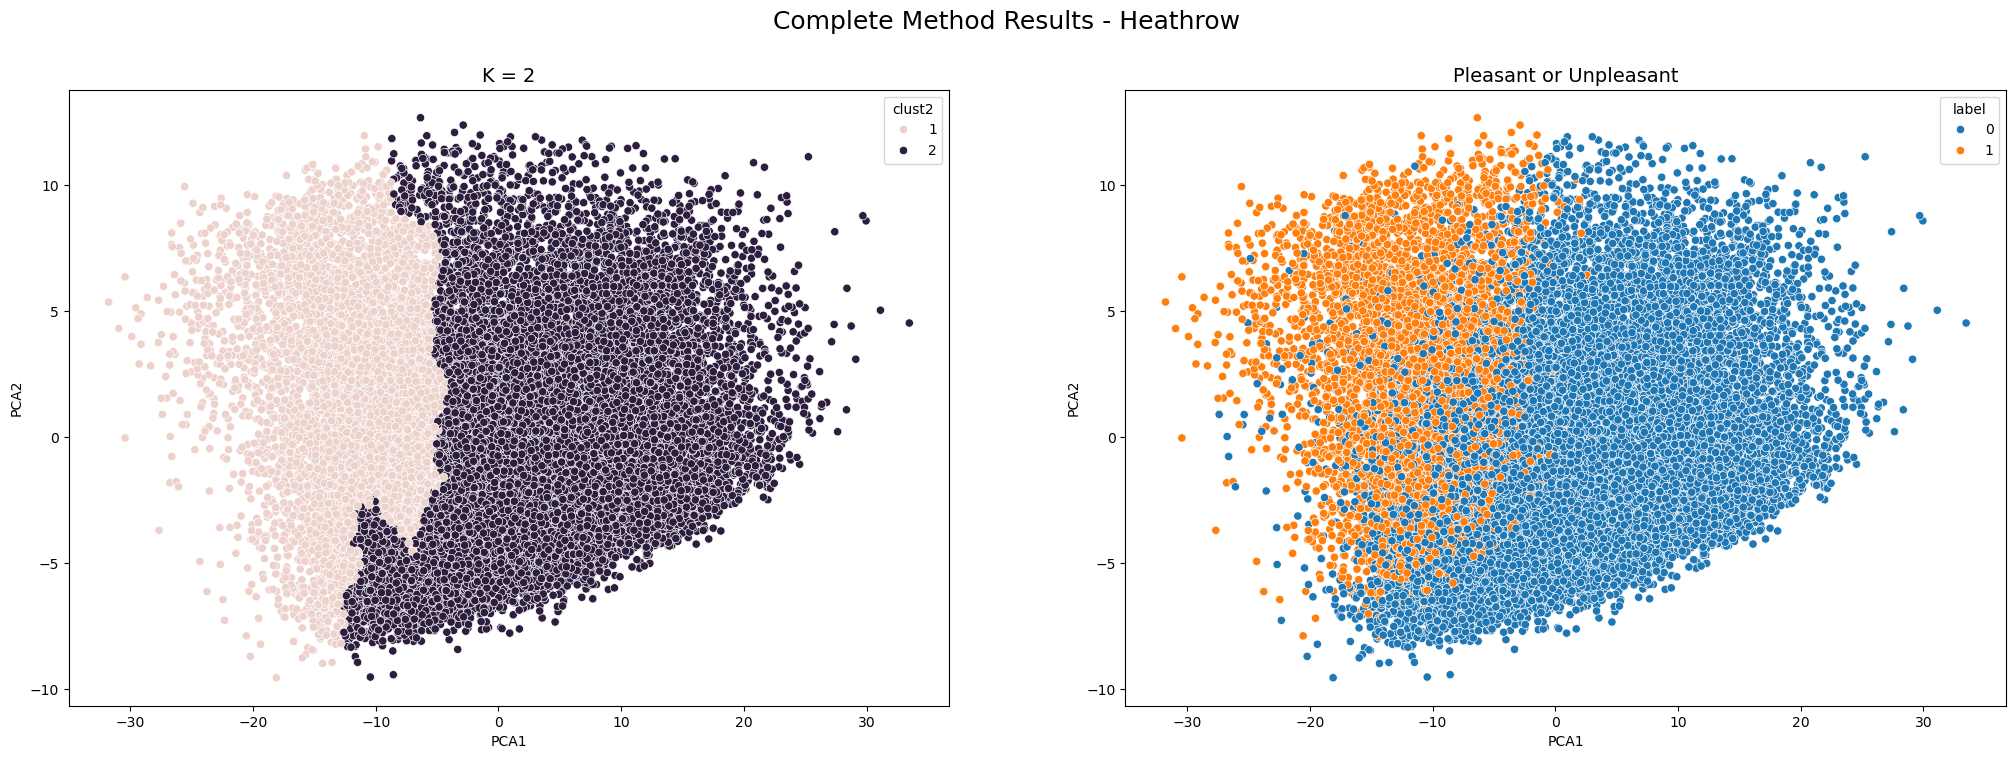

In [41]:
df_plot_heathrow=dfPCA_heathrow.copy()

df_plot_heathrow['clust2']=fcluster(distance_ward_heathrow,2, criterion='maxclust') # adding the clusters to the plotting dataframe
df_plot_heathrow["label"] = df_answers["HEATHROW_pleasant_weather"] # add a label column from the answers dataframe (we will do other stations later)

#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Complete Method Results - Heathrow",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_heathrow, hue="clust2")


plt.subplot(1,2,2)
plt.title("Pleasant or Unpleasant",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_heathrow, hue="label") # label here is from when we added the label column above

<Axes: title={'center': 'Pleasant or Unpleasant'}, xlabel='PCA1', ylabel='PCA2'>

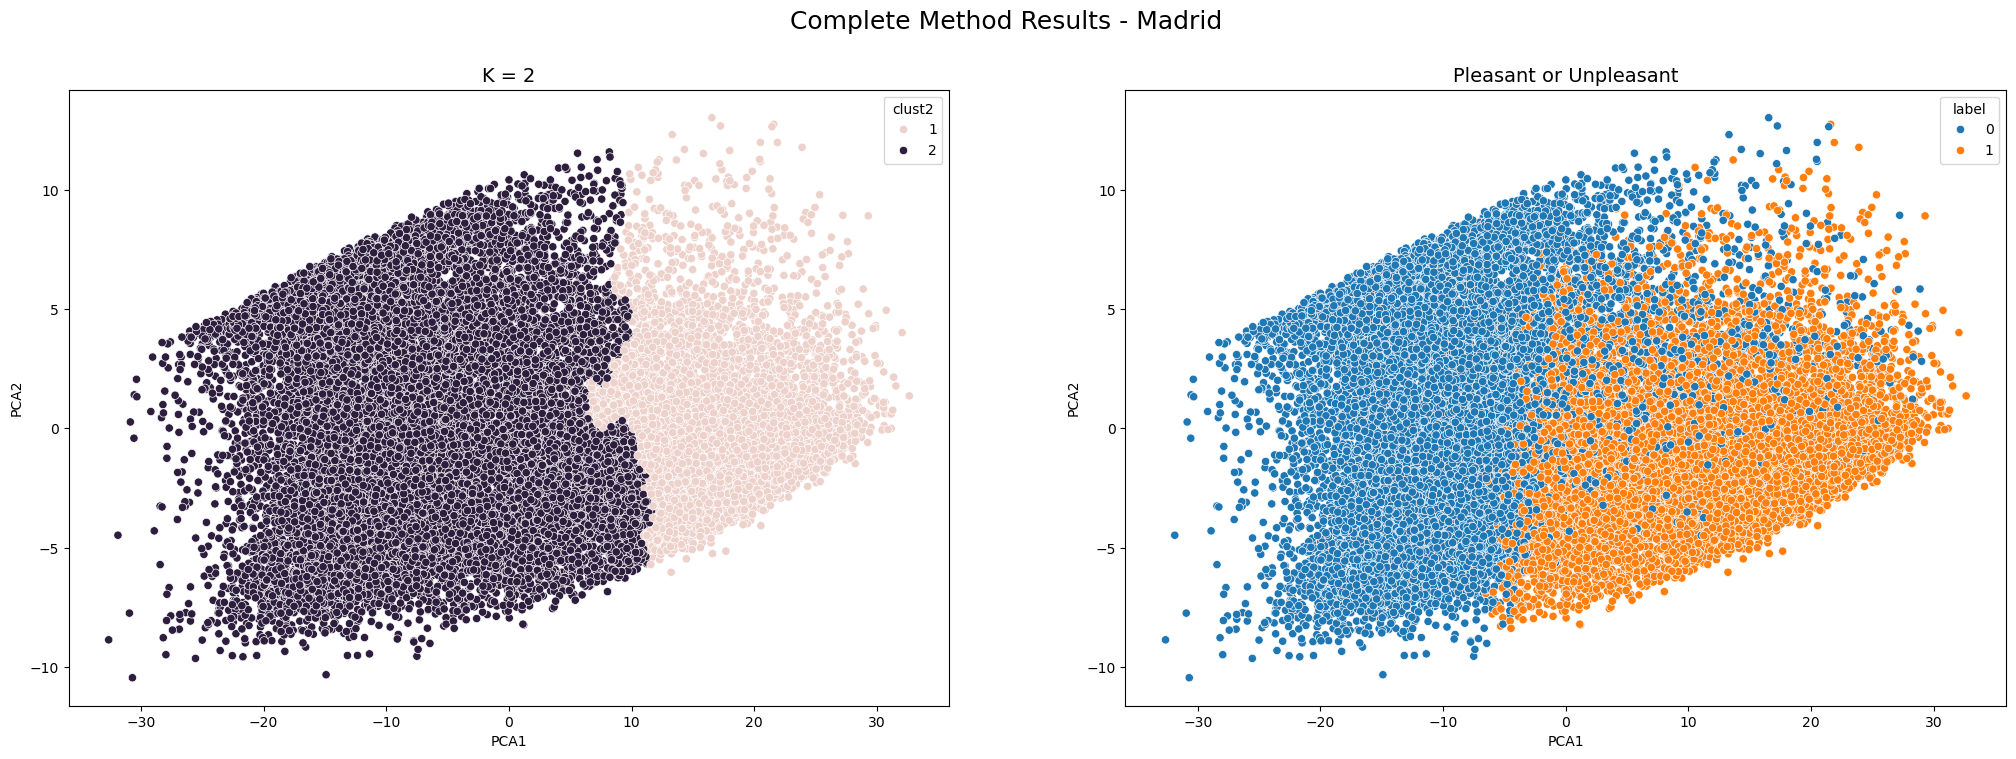

In [42]:
df_plot_madrid=dfPCA_madrid.copy()

df_plot_madrid['clust2']=fcluster(distance_ward_madrid,2, criterion='maxclust') # adding the clusters to the plotting dataframe
df_plot_madrid["label"] = df_answers["MADRID_pleasant_weather"] # add a label column from the answers dataframe (we will do other stations later)

#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Complete Method Results - Madrid",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_madrid, hue="clust2")


plt.subplot(1,2,2)
plt.title("Pleasant or Unpleasant",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_madrid, hue="label") # label here is from when we added the label column above

In [43]:
df_basel_WM=df_basel.copy()

df_basel_WM['clust2']=fcluster(distance_ward_basel,2, criterion='maxclust')
dfPCA_basel['clust2 WM'] = df_basel_WM['clust2'].values
dfPCA_basel['label'] = df_answers['BASEL_pleasant_weather']
dfPCA_basel.head()

PCA1      PCA2  clust2  label  clust2 WM
0   8.298215 -1.628643       2      0          2
1   7.755890 -2.046452       2      0          2
2   6.018101 -4.826221       2      0          2
3   6.388633  1.456182       2      0          2
4  13.266945  2.702852       1      0          2

In [44]:
df_heathrow_WM=df_heathrow.copy()

df_heathrow_WM['clust2']=fcluster(distance_ward_heathrow,2, criterion='maxclust')
dfPCA_heathrow['clust2 WM'] = df_heathrow_WM['clust2'].values
dfPCA_heathrow['label'] = df_answers['HEATHROW_pleasant_weather']
dfPCA_heathrow.head()

PCA1      PCA2  clust2  label  clust2 WM
0  4.530887 -5.866871       2      0          2
1  8.331202 -2.903513       2      0          2
2  4.955451 -4.123214       2      0          2
3  6.197688 -5.007645       2      0          2
4  5.953761 -3.094584       2      0          2

In [45]:
df_madrid_WM=df_madrid.copy()

df_madrid_WM['clust2']=fcluster(distance_ward_madrid,2, criterion='maxclust')
dfPCA_madrid['clust2 WM'] = df_madrid_WM['clust2'].values
dfPCA_madrid['label'] = df_answers['MADRID_pleasant_weather']
dfPCA_madrid.head()

PCA1      PCA2  clust2  label  clust2 WM
0 -14.090114  3.658014       2      0          1
1 -10.730777  5.858698       2      0          1
2 -12.341287  3.353443       2      0          1
3  -7.156638 -4.994243       2      0          1
4  -4.815045 -1.671633       2      0          2

<Axes: title={'center': 'Pleasant or Unpleasant'}, xlabel='PCA1', ylabel='PCA2'>

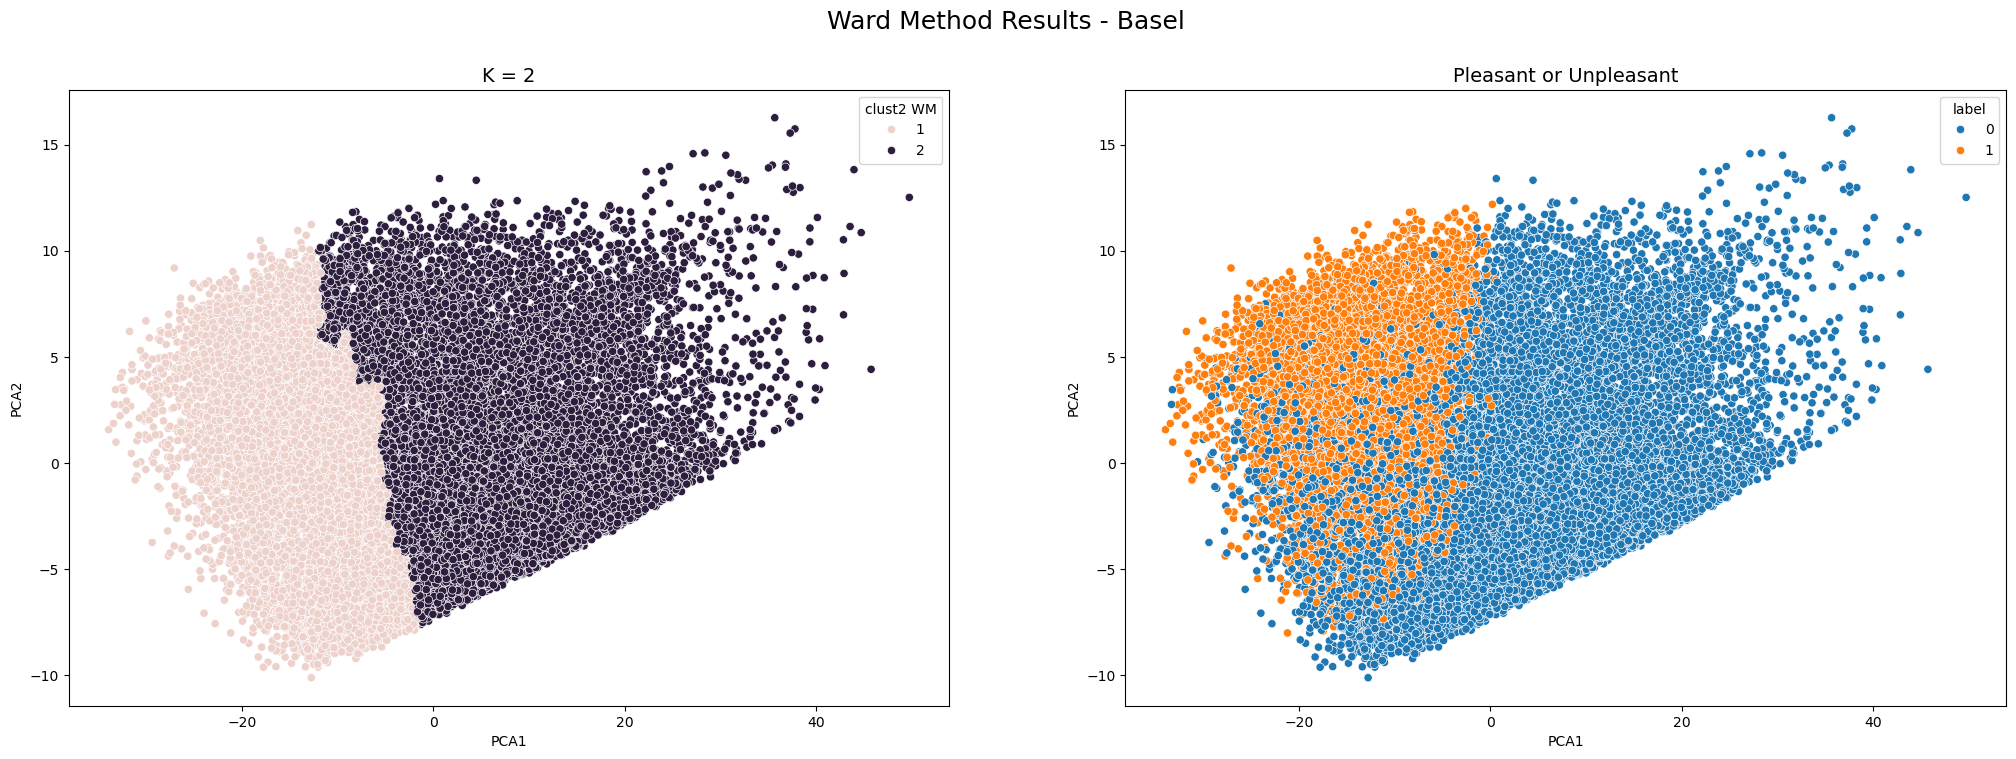

In [46]:
df_plot_basel=dfPCA_basel.copy()

df_plot_basel['clust2 WM']=fcluster(distance_ward_basel,2, criterion='maxclust') # adding the clusters to the plotting dataframe
df_plot_basel["label"] = df_answers["BASEL_pleasant_weather"] # add a label column from the answers dataframe (we will do other stations later)

#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Ward Method Results - Basel",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_basel, hue="clust2 WM")


plt.subplot(1,2,2)
plt.title("Pleasant or Unpleasant",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_basel, hue="label") # label here is from when we added the label column above

<Axes: title={'center': 'Pleasant or Unpleasant'}, xlabel='PCA1', ylabel='PCA2'>

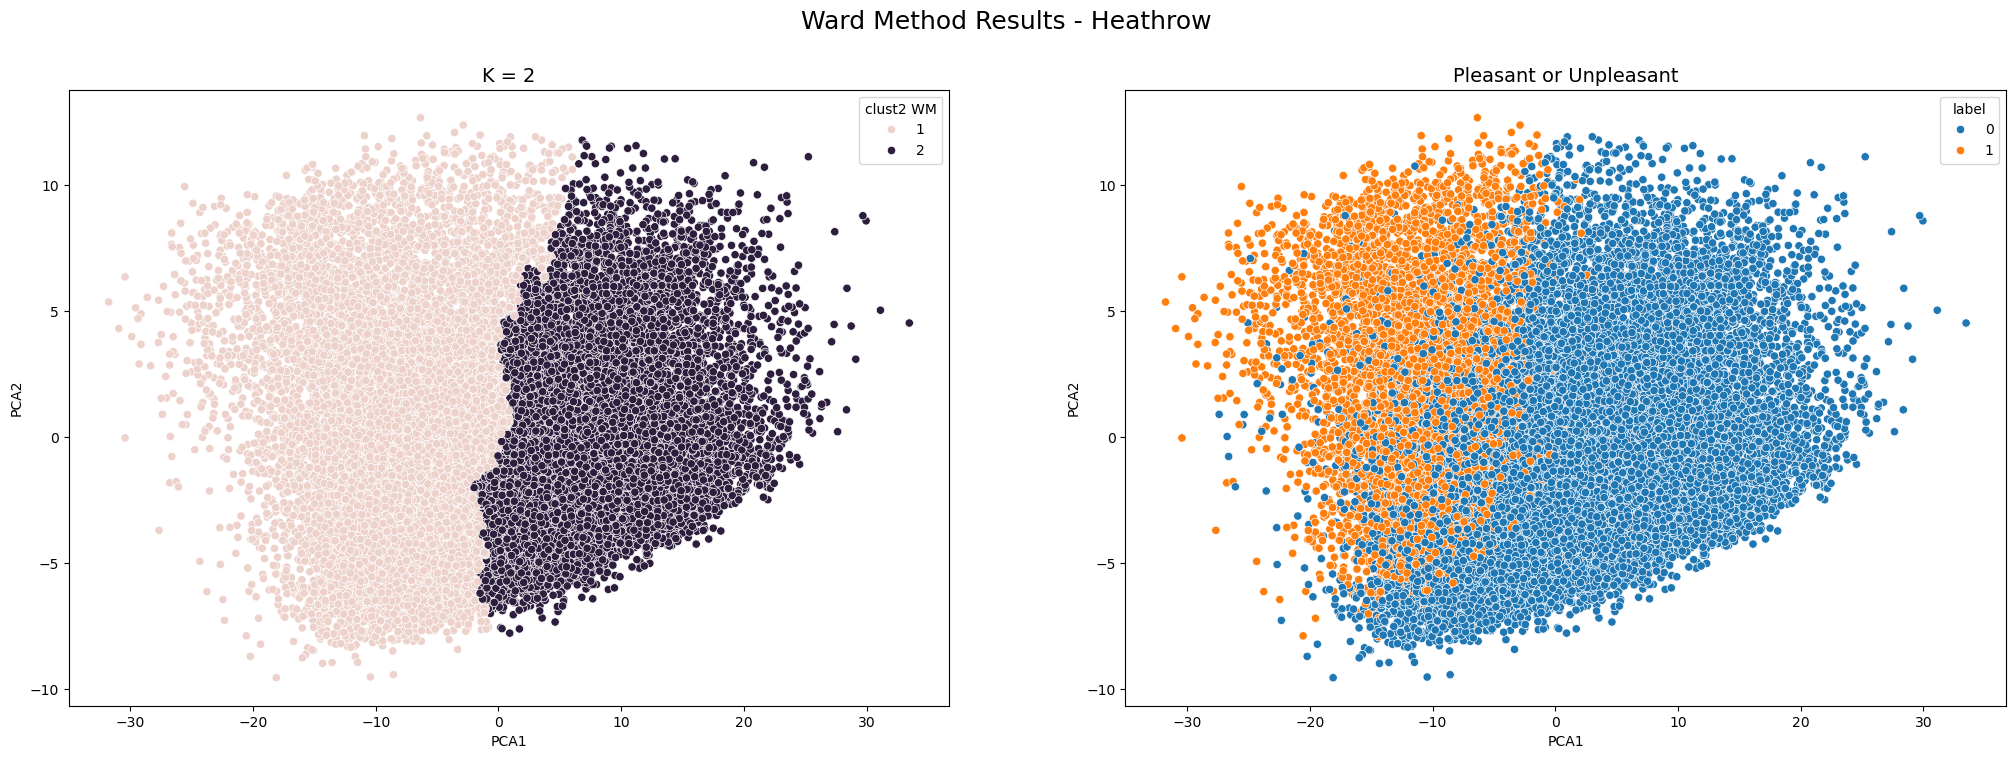

In [47]:
df_plot_heathrow=dfPCA_heathrow.copy()

df_plot_heathrow['clust2 WM']=fcluster(distance_ward_heathrow,2, criterion='maxclust') # adding the clusters to the plotting dataframe
df_plot_heathrow["label"] = df_answers["HEATHROW_pleasant_weather"] # add a label column from the answers dataframe (we will do other stations later)

#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Ward Method Results - Heathrow",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_heathrow, hue="clust2 WM")


plt.subplot(1,2,2)
plt.title("Pleasant or Unpleasant",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_heathrow, hue="label") # label here is from when we added the label column above

<Axes: title={'center': 'Pleasant or Unpleasant'}, xlabel='PCA1', ylabel='PCA2'>

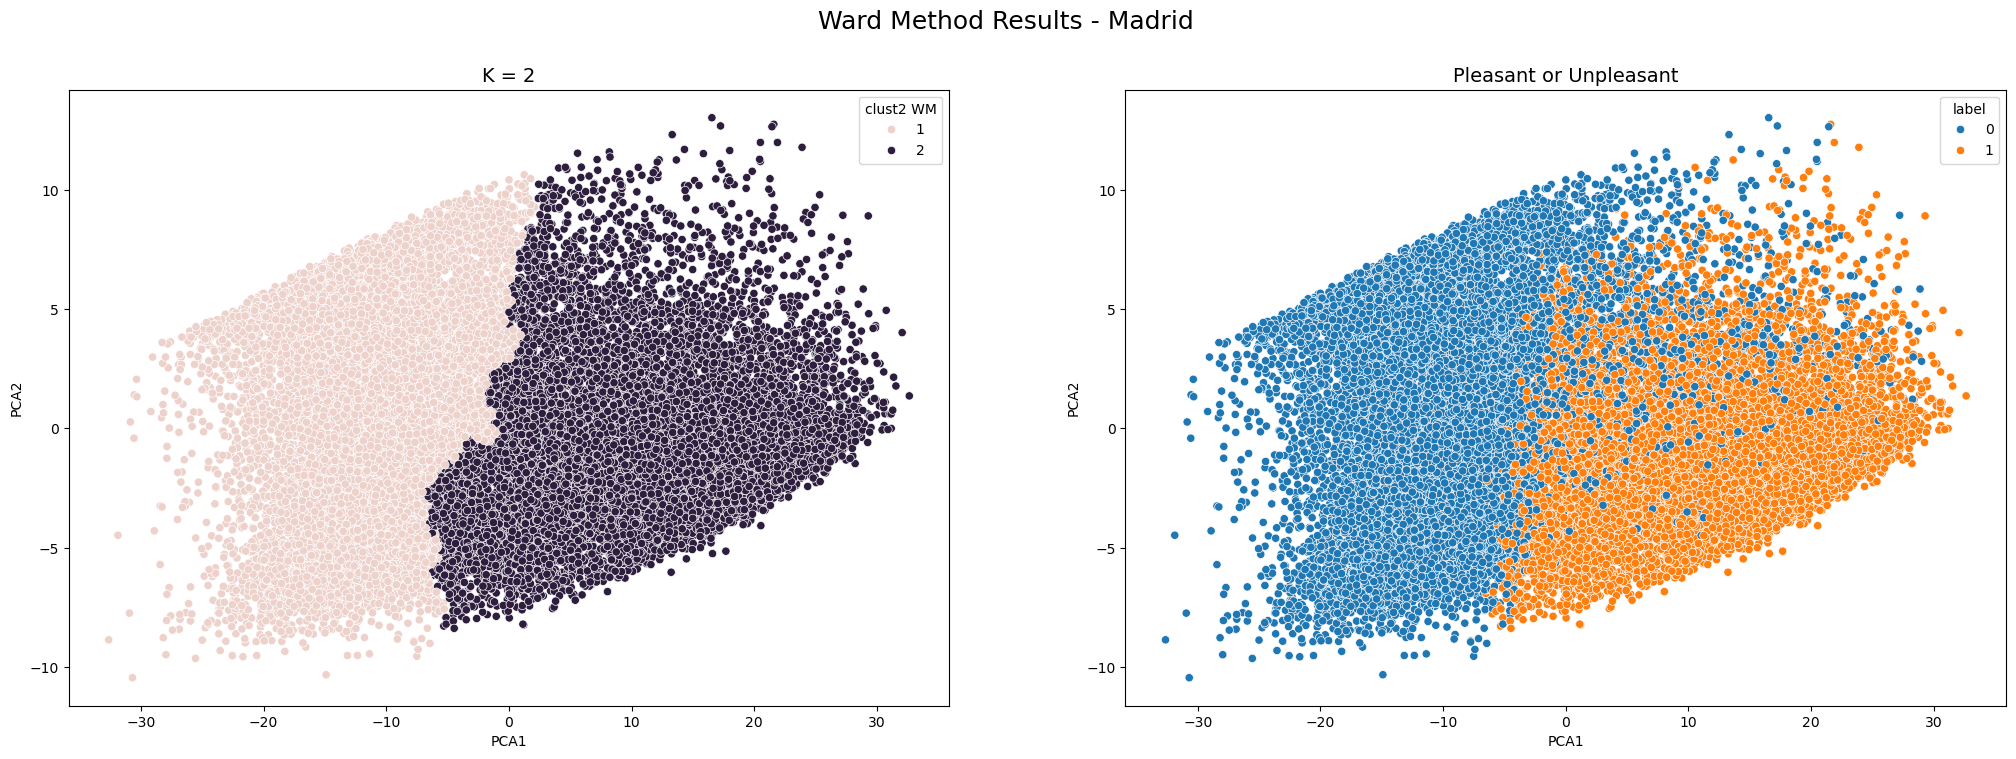

In [48]:
df_plot_madrid=dfPCA_madrid.copy()

df_plot_madrid['clust2 WM']=fcluster(distance_ward_madrid,2, criterion='maxclust') # adding the clusters to the plotting dataframe
df_plot_madrid["label"] = df_answers["MADRID_pleasant_weather"] # add a label column from the answers dataframe (we will do other stations later)

#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Ward Method Results - Madrid",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_madrid, hue="clust2 WM")


plt.subplot(1,2,2)
plt.title("Pleasant or Unpleasant",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA_madrid, hue="label") # label here is from when we added the label column above